In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from utils.storage.truth_db import SQLiteTruthSaver
from utils.storage.bluesky_db import SQLiteBlueSkySaver

## 0. Extracting Graphs and Subgraphs

In [41]:
#Truth_Graph = SQLiteTruthSaver().extract_network()
#nx.write_gexf(Truth_Graph, "truth.gexf")

# Bluesky_Graph = SQLiteBlueSkySaver().extract_network()
# nx.write_gexf(Bluesky_Graph, "bluesky.gexf")

Truth_Graph = nx.read_gexf("truth.gexf")
Bluesky_Graph = nx.read_gexf("bluesky.gexf")

## 1. Basic Measures

Order, Size, Degree Distribution and Connected Components

In [40]:
print(Truth_Graph.order(), Truth_Graph.size())
print(nx.density(Truth_Graph))

29291 51447
5.9966193878991e-05


In [9]:
ts_degree = dict(Truth_Graph.degree())
ts_degree_values =list(ts_degree.values())

np.arange(min(ts_degree_values),max(ts_degree_values)+1)
ts_count, ts_bins = np.histogram(ts_degree_values, bins=np.arange(min(ts_degree_values),max(ts_degree_values)+2))

ts_pdf = ts_count / Truth_Graph.order()

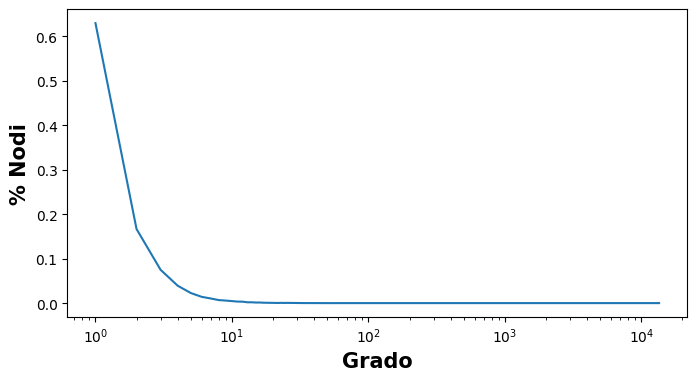

Min Degree: 1
Max Degree: 13481
Average Degree: 3.512819637431293


In [36]:
ts_fig = plt.figure(figsize=(8,4))
plt.plot(ts_bins[:-1],ts_pdf)
plt.xscale('log')
plt.xlabel('Grado',size=15, weight = 'bold')
plt.ylabel('% Nodi',size=15, weight = 'bold')

plt.show()

print(f"Min Degree: {min(ts_degree_values)}")
print(f"Max Degree: {max(ts_degree_values)}")
print(f"Average Degree: {np.mean(ts_degree_values)}")

In [11]:
ts_cc = nx.connected_components(Truth_Graph.to_undirected())
for component in sorted(ts_cc, key=len, reverse=True):
    print(f"Connected Component of size: {len(component)}")

Connected Component of size: 29275
Connected Component of size: 3
Connected Component of size: 3
Connected Component of size: 2
Connected Component of size: 2
Connected Component of size: 2
Connected Component of size: 2
Connected Component of size: 2


In [3]:
print(Bluesky_Graph.order(), Bluesky_Graph.size())
print(nx.density(Bluesky_Graph))

14735 17607
8.109882435492535e-05


In [12]:
bs_degree = dict(Bluesky_Graph.degree())
bs_degree_values =list(bs_degree.values())

np.arange(min(bs_degree_values), max(bs_degree_values) + 1)
bs_count, bs_bins = np.histogram(bs_degree_values, bins=np.arange(min(bs_degree_values), max(bs_degree_values) + 2))

bs_pdf = bs_count / Bluesky_Graph.order()

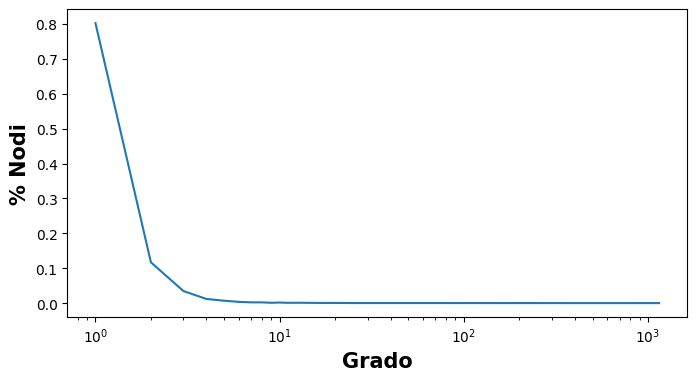

Min Degree: 1
Max Degree: 1148
Average Degree: 2.38982015609094


In [34]:
bs_fig = plt.figure(figsize=(8,4))
plt.plot(bs_bins[:-1],bs_pdf)
plt.xscale('log')
plt.xlabel('Grado',size=15, weight = 'bold')
plt.ylabel('% Nodi',size=15, weight = 'bold')

plt.show()

print(f"Min Degree: {min(bs_degree_values)}")
print(f"Max Degree: {max(bs_degree_values)}")
print(f"Average Degree: {np.mean(bs_degree_values)}")

In [15]:
bs_cc = nx.connected_components(Bluesky_Graph.to_undirected())
for component in sorted(bs_cc, key=len, reverse=True)[:10]:
    print(f"Connected Component of size: {len(component)}")

Connected Component of size: 13957
Connected Component of size: 21
Connected Component of size: 19
Connected Component of size: 14
Connected Component of size: 14
Connected Component of size: 13
Connected Component of size: 11
Connected Component of size: 10
Connected Component of size: 9
Connected Component of size: 9


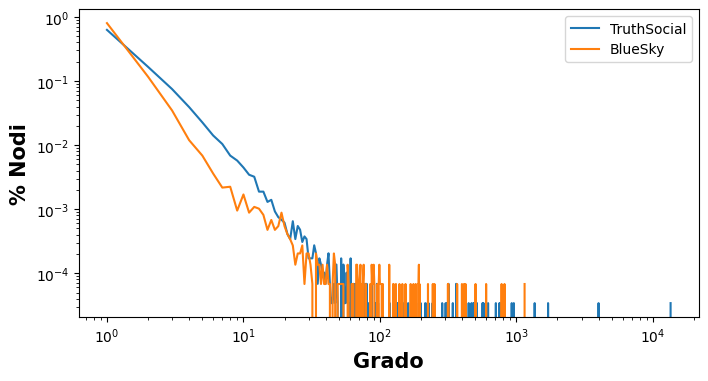

In [38]:
fig = plt.figure(figsize=(8,4))
plt.plot(ts_bins[:-1], ts_pdf, label="TruthSocial")
plt.plot(bs_bins[:-1], bs_pdf, label="BlueSky")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Grado',size=15, weight = 'bold')
plt.ylabel('% Nodi',size=15, weight = 'bold')

plt.legend()
plt.show()